### Import Libraries and Data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to folder
path = r'C:\Users\Kripamahesh\Documents\08-06-2023 Instcart Basket Analysis'

### Step 1 Import the merged version of data contains new customer column 

In [3]:
# Import ords_prods_customers_merged pkl file 


df_cust_merged=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer_merged.pkl'))

In [4]:
df_cust_merged.shape

(32434212, 35)

In [ ]:
df_cust_merged.head()

In [ ]:
df_cust_merged.info()

In [ ]:
df_cust_merged['avg_price'] = df_cust_merged['avg_price'].astype('float16')

In [ ]:
df_cust_merged['mean_price'] = df_cust_merged['mean_price'].astype('float16')

In [ ]:
df_cust_merged['median_pur'] = df_cust_merged['median_pur'].astype('float16')

In [ ]:
df_cust_merged['median_days'] = df_cust_merged['median_days'].astype('float16')

In [ ]:
df_cust_merged['max_order'] = df_cust_merged['max_order'].astype('int32')


In [ ]:
df_cust_merged.info()

### Step 2 Address any PII data

In [ ]:
# Remove the Names columns as Names as considered as PII Data

df_cust_merged.drop(['First Name', 'Last Name'], axis=1, inplace= True)

In [ ]:
df_cust_merged.shape

### Step 3 Create a Region column based on state colummn



In [28]:
# Define Region based on state geograhical 

region=[]
for value in df_cust_merged['State']:
        if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
            region.append('Northeast')
        elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
            region.append('Midwest')
        elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
            region.append('South')
        else:
            region.append('West')

In [30]:
# Create a region column

df_cust_merged['region']=region

In [32]:
# Create a cross tab for region and spending flag

region_spend_crosstab= pd.crosstab(df_cust_merged['region'],df_cust_merged['spending_flag'],dropna= False)

In [ ]:
region_spend_crosstab

#### Observation:  There is no much difference the regions. Each regions has less no of High spender and high in number of Low spender 

### Step 4 Create an exclusion flag for low activity customers

In [6]:
# Create an exclusion flag
df_cust_merged.loc[df_cust_merged['max_order'] < 5, 'customer_activity'] = 'Low-activity customers'


In [7]:
df_cust_merged.loc[df_cust_merged['max_order'] >= 5, 'customer_activity'] = 'High-activity customers'

In [ ]:
# Check value counts
df_cust_merged['customer_activity'].value_counts(dropna=False)

In [8]:
# Subset for High activity customer

df_high_act_cust=df_cust_merged[df_cust_merged['customer_activity']=='High-activity customers']

In [9]:
# Export High activity customer

df_high_act_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_act_cust.pkl'))

In [10]:
df_cust_merged.columns

Index(['user_id', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_after_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'prices_range_loc', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'mean_price', 'median_pur', 'median_days',
       'frequency_flag', 'customer_activity'],
      dtype='object')

### Step 5 Create profiling variables

In [16]:
# Create groups for Age profiling 

df_high_act_cust.loc[(df_high_act_cust['Age']>=35) & (df_high_act_cust['Age']<60),'age_flag'] ='Middle Age'

In [17]:
df_high_act_cust.loc[df_high_act_cust['Age']<35,'age_flag'] ='Young Adult'

In [18]:
df_high_act_cust.loc[df_high_act_cust['Age']<60,'age_flag'] ='Elderly'

In [19]:
df_high_act_cust['age_flag'].value_counts(dropna = False)

Elderly    20408723
Senior     10583941
Name: age_flag, dtype: int64

In [20]:
df_high_act_cust.shape

(30992664, 37)

### Step 6 Visualization

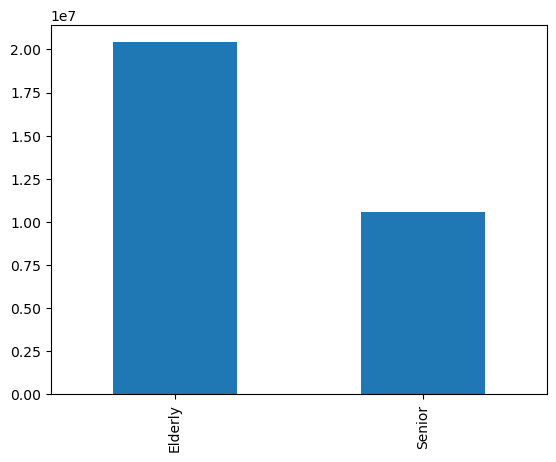

In [21]:
# Bar Chart

age_bar=df_high_act_cust['age_flag'].value_counts().plot.bar()

In [24]:
# Save the visualization

age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))


### Step 7  Aggregate min,max,mean variables

In [26]:
# Aggregate min,max,mean 

df_high_act_cust.groupby('age_flag').agg({'days_after_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_after_last_order                 prices          
                           max       mean  min    max mean  min
age_flag                                                       
Elderly                   30.0  10.815273  0.0    inf  NaN  1.0
Senior                    30.0  10.800991  0.0    inf  NaN  1.0

In [35]:
region=[]
for value in df_high_act_cust['State']:
        if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
            region.append('Northeast')
        elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
            region.append('Midwest')
        elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
            region.append('South')
        else:
            region.append('West')

In [37]:
df_high_act_cust['region']=region

C:\Users\Kripamahesh\AppData\Local\Temp\ipykernel_9604\11727361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_act_cust['region']=region


### Step 8 Customer profile with regions and department_id

In [39]:
# Crosstab between age and region

crosstab_dept_region=pd.crosstab(df_high_act_cust['region'], df_high_act_cust['department_id'],dropna=False)


### Step 9 Chart to illustrate the results and export 

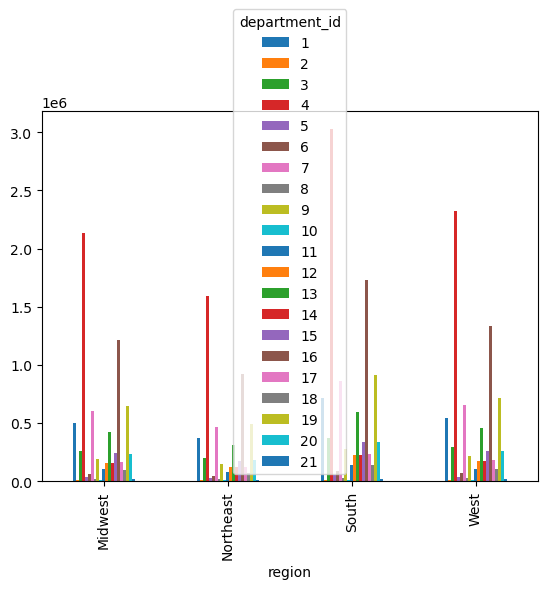

In [40]:
crosstab_dept_region=crosstab_dept_region.plot.bar()

In [41]:
# Export the Chart

bar_region_department=crosstab_dept_region.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_region_department'))